# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here

# import libraries  here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:

#your code here
data = pd.read_csv('Boston.csv')
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [3]:
#your code here
data.corr()

#From the values of correlation below, I'm choosing the columns "black","rm","zn" ,"dis" which have a fair positive correlation with our target variable MEDV.

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
Unnamed: 0,1.000000,0.407407,-0.103393,0.399439,-0.003759,0.398736,-0.079971,0.203784,-0.302211,0.686002,0.666626,0.291074,-0.295041,0.258465,-0.226604
crim,0.407407,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.103393,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.399439,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.003759,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.398736,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.079971,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.203784,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.302211,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.686002,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626


C:\Users\P. Scalia\AppData\Roaming\Python\Python37\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


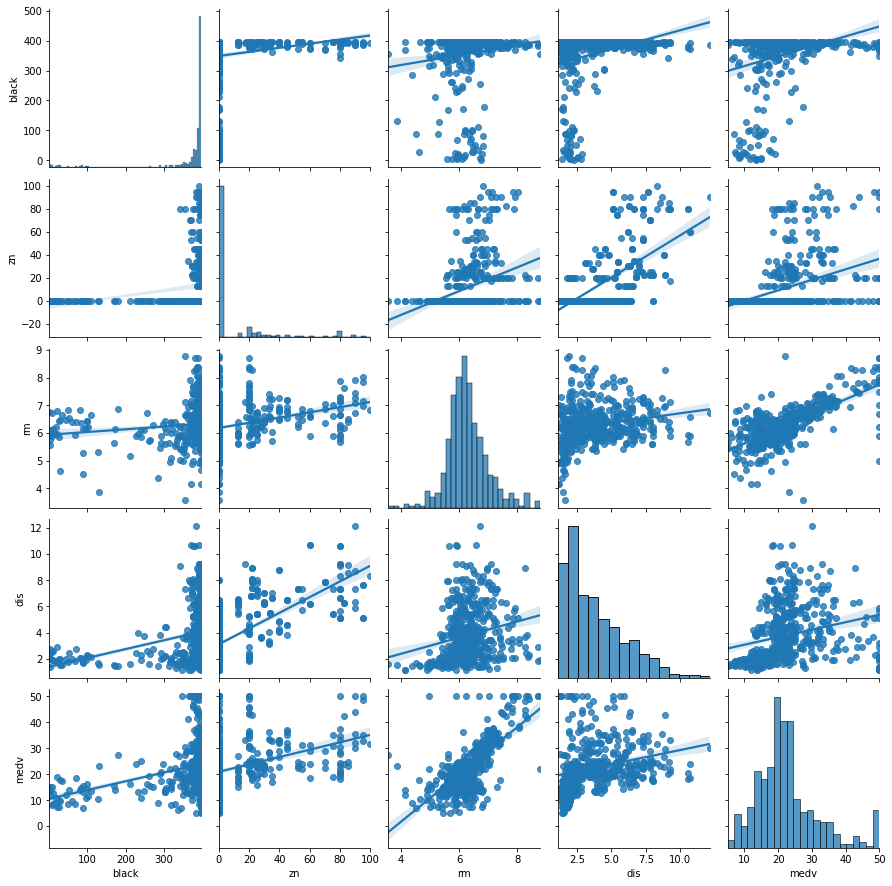

In [4]:

# Your plots here
sns.pairplot(data=data,vars = ['black','zn','rm','dis','medv'],kind="reg",palette = "husl")

In [22]:
#paolo: good idea to use a pairplot

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
- Reference: https://www.kaggle.com/c/boston-housing

In [5]:
### Your response here
#Refering to the link above, a description of the features in this dataset :
"""""crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in $1000s."""""

#From the plots above, the inferences are:
"""""1.Target variable "medv" - Median value(price)of homes are comparitively the most correlated to "rm"-the no.of rooms per dwelling.
2.Next to "rm" ,it is "dis"-the weighted mean of distances from employment centres which impacts the pricing.
3.The column "black"  which is a measure of the proportion of blacks in the town also seem to have a positive influence on the pricing.
4."zn" - Zone of residential land is positively correlated with the pricing.
5. "Lstat" - is most negatively corelated with house pricing."""""

'""1.Target variable "medv" - Median value(price)of homes are comparitively the most correlated to "rm"-the no.of rooms per dwelling.\n2.Next to "rm" ,it is "dis"-the weighted mean of distances from employment centres which impacts the pricing.\n3.The column "black"  which is a measure of the proportion of blacks in the town also seem to have a positive influence on the pricing.\n4."zn" - Zone of residential land is positively correlated with the pricing.\n5. "Lstat" - is most negatively corelated with house pricing.'

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

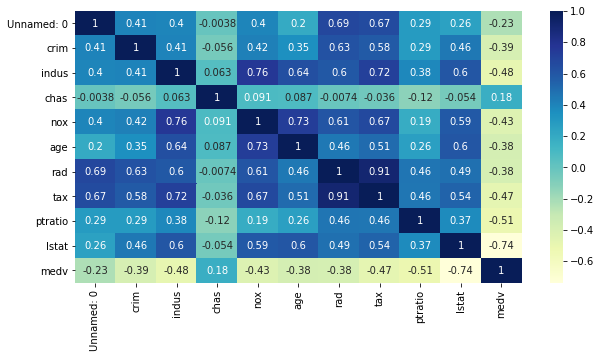

In [6]:
#your code here
fig, ax = plt.subplots(figsize=(10, 5))
# plot heatmap
df = data.copy()
df.drop(columns = ['black','zn','rm','dis'] ,inplace = True)
sns.heatmap(df.corr(),cmap="YlGnBu", annot = True)
plt.show()

#### Significant correlations


In [7]:
#your code here
"""there is one more  feature "chas" - Charles River dummy variable 
    which has a slightly positive correlation with the target"""

'there is one more  feature "chas" - Charles River dummy variable \n    which has a slightly positive correlation with the target'

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [8]:
# Your code here
data['medv'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [24]:
#your code here
y = data['medv']
X = data.drop('medv', axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state = 42, shuffle = True)

----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [25]:
#your code here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

def rfr(max_depth):
    model = RandomForestRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    score_train = model.score(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score_test = model.score(X_test, y_pred)
    
    return (score_train, score_test)



In [26]:
max_depth= [2,4,6,8,10]
scores = []

for i in max_depth:
    score = rfr(i)
    scores.append(score)

print(scores)

[(0.7685696733741102, 1.0), (0.9093110007609693, 1.0), (0.9495095064991107, 1.0), (0.967952549163529, 1.0), (0.9744390047045204, 1.0)]


Now, plot the score for each tree on the training set and on the testing set.

In [12]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here
df_scores = pd.DataFrame(max_depth, columns=['max_depth'])
df_scores['scores'] = scores
df_scores[['score_train', 'score_test']] = pd.DataFrame(df_scores['scores'].tolist(), index=df_scores.index) 
df_scores = df_scores.drop(columns=['scores'])
df_scores

,max_depth,score_train,score_test
0,2,0.756304,1.0
1,4,0.907859,1.0
2,6,0.951305,1.0
3,8,0.971225,1.0
4,10,0.971156,1.0


In [28]:
#paolo: something very weird -all test scores are higher than train scores!
# probably there is something off- could be good idea to double check

What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [13]:
# Your response here
"""Higher the max_depth, the higher the test_score"""

'Higher the max_depth, the higher the test_score'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [14]:

# Your response here
#Maximum depth of 10 indicates a high variance (hence a low bias) and fits very well to the data.
#Viceversa for a max depth of 1.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

#### Train the Random forest regressor model with the optimal value for max_depth

In [29]:
#your code here
model8 = RandomForestRegressor(max_depth=8, random_state=0)
model8.fit(X_train, y_train)
y_pred8 = model8.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred8})

,test,predicted
173,23.6,22.877716
274,32.4,30.990383
491,13.6,15.859549
72,22.8,23.219028
452,16.1,16.568056
...,...,...
412,17.9,12.168177
436,9.6,12.879216
411,17.2,13.797108
86,22.5,20.731599


#### Use the mean absolute error (MAE) to calculate the performance of the model

In [30]:
#your code here
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred8)


2.100760063040965

#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [31]:

#your code here
import math
MSE = sklearn.metrics.mean_squared_error(y_test, y_pred8)
RMSE = math.sqrt(MSE)
RMSE

3.1668179777353465

#### Create a function that calculates  and returns the r2 score as performance metric

In [32]:
#your code here
def r2_score(y_test, y_pred):
    return sklearn.metrics.r2_score(y_test, y_pred)


#### Calculate the r2 score of the model using the function defined above

In [33]:
#your code here
r2_score(y_test,y_pred8)

0.8632453465249041

#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [20]:
#your answer here

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [21]:
#Your response here
#Your response here
#1. The data is pretty outdated, that too for a major city like Boston there would be an inomparably huge difference in the housing prices.
#2. On a high level,Some features in the dataset seem to be irrelevant without needing to look at the correlation data,while some addl.features 
#  can be included depending on whether its a city or outskirts. 
#Hence the predictions based on this dataset would not hold good currently or if dated back,not for a small town
#either.


In [34]:
#paolo: good work!